In [2]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [3]:
def readDatas(dataPath: str):
    return pd.read_csv(dataPath,delimiter=',', header='infer')

In [4]:
def plotDataDistribution(df_world_happiness):
    fig,axes = plt.subplots(nrows=3,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Economy..GDP.per.Capita."])
    axes[1].set_title("PIB")

    axes[2].hist(df_world_happiness["Freedom"])
    axes[2].set_title("Freedom")
    plt.show()

In [5]:
def plotData(df_world_happiness):
    axes  = plt.figure().add_subplot(projection='3d')

    axes.scatter(df_world_happiness["Economy..GDP.per.Capita."],df_world_happiness["Freedom"],df_world_happiness["Happiness.Score"])
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_zlabel('Freedom')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()

In [6]:
def getTrainingAndValidationSets(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [(df_world_happiness["Economy..GDP.per.Capita."].iloc[index],df_world_happiness["Freedom"].iloc[index]) for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [(df_world_happiness["Economy..GDP.per.Capita."].iloc[index],df_world_happiness["Freedom"].iloc[index]) for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationDatas(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    axes  = plt.figure().add_subplot(projection='3d')

    xTraining = [point[0] for point in trainingInputSet]
    yTraining = [point[1] for point in trainingInputSet]

    xValidation = [point[0] for point in validationInputSet]
    yValidation = [point[1] for point in validationInputSet]

    axes.scatter(xTraining,yTraining,trainingOutputSet)
    axes.scatter(xValidation,yValidation,validationOutputSet)
    axes.set_xlabel('GDP')
    axes.set_ylabel('Happiness')
    axes.set_zlabel('Freedom')
    axes.set_title('Relation between GDP, Freedom and Happiness')
    plt.show()

In [7]:
def getRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    xx = [el for el in trainingInputSet]

    regressor = linear_model.LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor

In [54]:
def plotRegressor(df_world_happiness):

    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    noOfPoints = 1000
    xref = []
    gdp = [point[0] for point in trainingInputSet]
    freedom = [point[1] for point in trainingInputSet]
    valGDP = min(gdp)
    valFreedom = min(freedom)
    stepGDP = (max(gdp) - min(gdp)) / noOfPoints
    stepFreedom = (max(freedom) - min(freedom)) / noOfPoints
    for _ in range(1, noOfPoints):
        xref.append((valGDP,valFreedom))
        valGDP += stepGDP
        valFreedom += stepFreedom
    yref = [w0 + w1 * el[0] + w2 * el[1] for el in xref] 

    axes  = plt.figure().add_subplot(projection='3d')

    axes.scatter(gdp,freedom,trainingOutputSet)
    axes.plot([x[0] for x in xref],[x[1] for x in xref], yref,'red')                  #model is plotted by a blue line
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('GDP')
    axes.set_ylabel('happiness')
    plt.show()


In [32]:
from sklearn.metrics import mean_squared_error

def getErrors(df_world_happiness):
    _,_,validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    computedValidationOutputs = regressor.predict([x for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


## Problema 1

In [33]:
world_happiness = readDatas("datas/v1_world-happiness-report-2017.csv")
world_happiness = world_happiness.dropna()

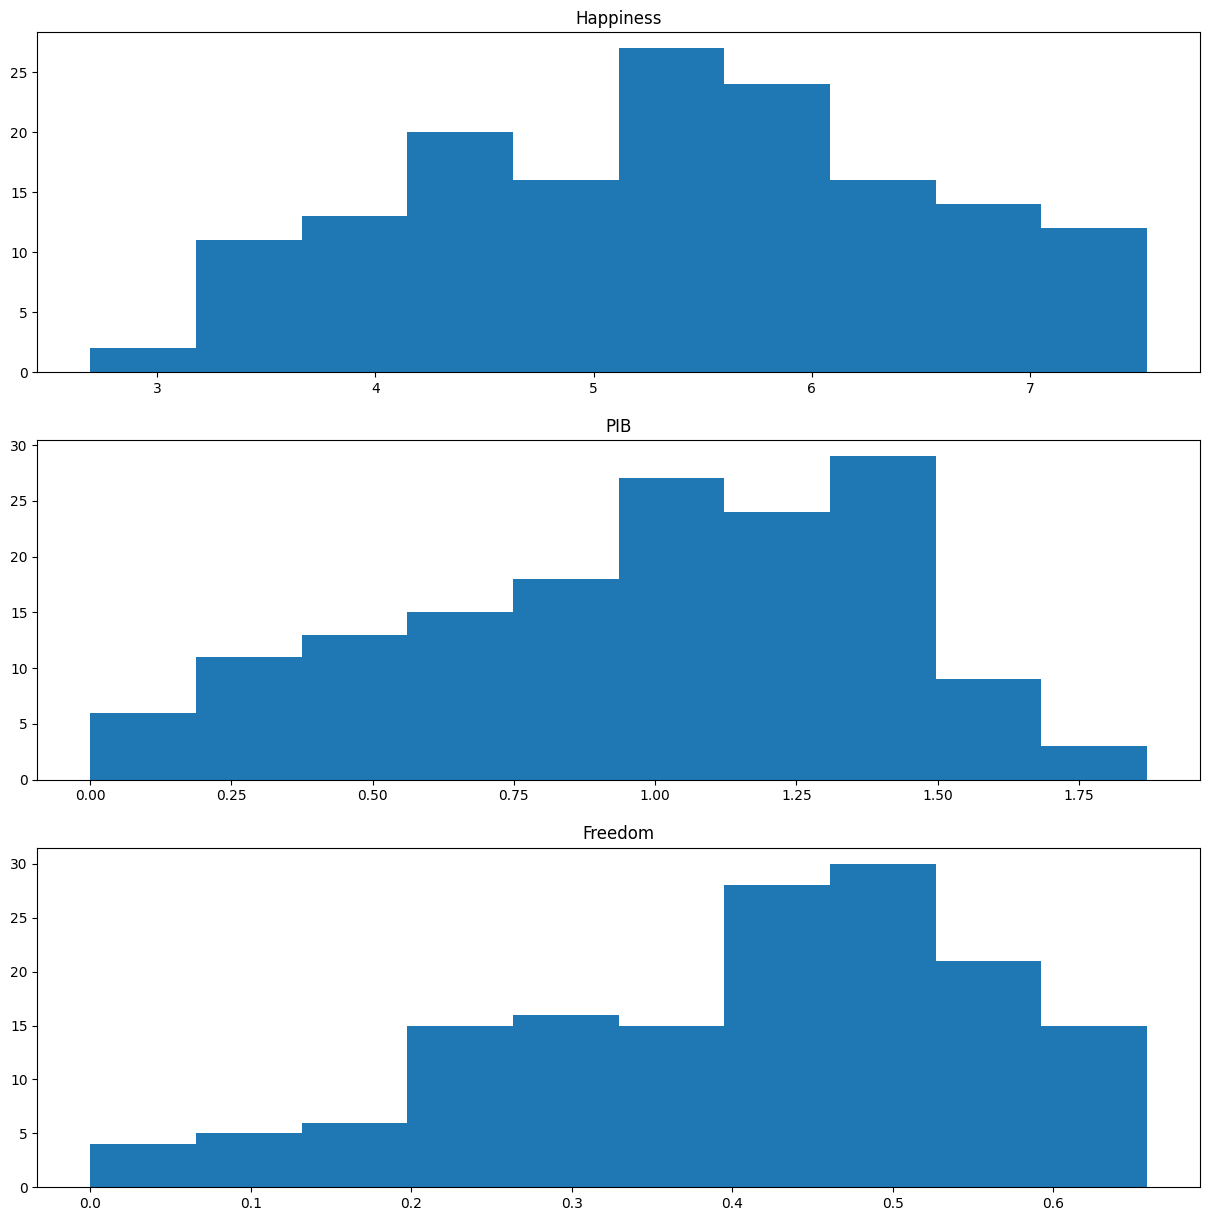

In [34]:
plotDataDistribution(world_happiness)

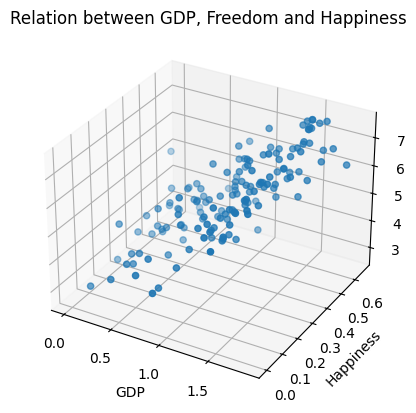

In [35]:
plotData(world_happiness)

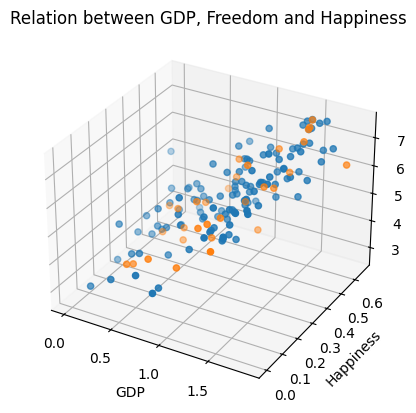

In [36]:
plotTrainingAndValidationDatas(world_happiness)

In [37]:
regresor = getRegressor(world_happiness)
w0, w1, w2 = regresor.intercept_, regresor.coef_[0], regresor.coef_[1]

print("f(x) = {} + {}*x1 + {}*x2".format(w0,w1,w2))

f(x) = 2.6017918934198074 + 1.8734301875140684*x1 + 2.294166135624865*x2


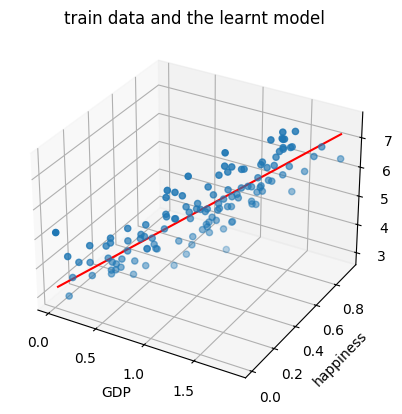

In [55]:
plotRegressor(world_happiness)

In [39]:
mErr, cErr = getErrors(world_happiness)

print("Manual error: {}\nComputed error: {}".format(mErr,cErr))

Manual error: 0.2861256065176801
Computed error: 0.2861256065176801


## Problema 2

In [40]:
world_happiness = readDatas("datas/v2_world-happiness-report-2017.csv")
world_happiness = world_happiness.dropna()

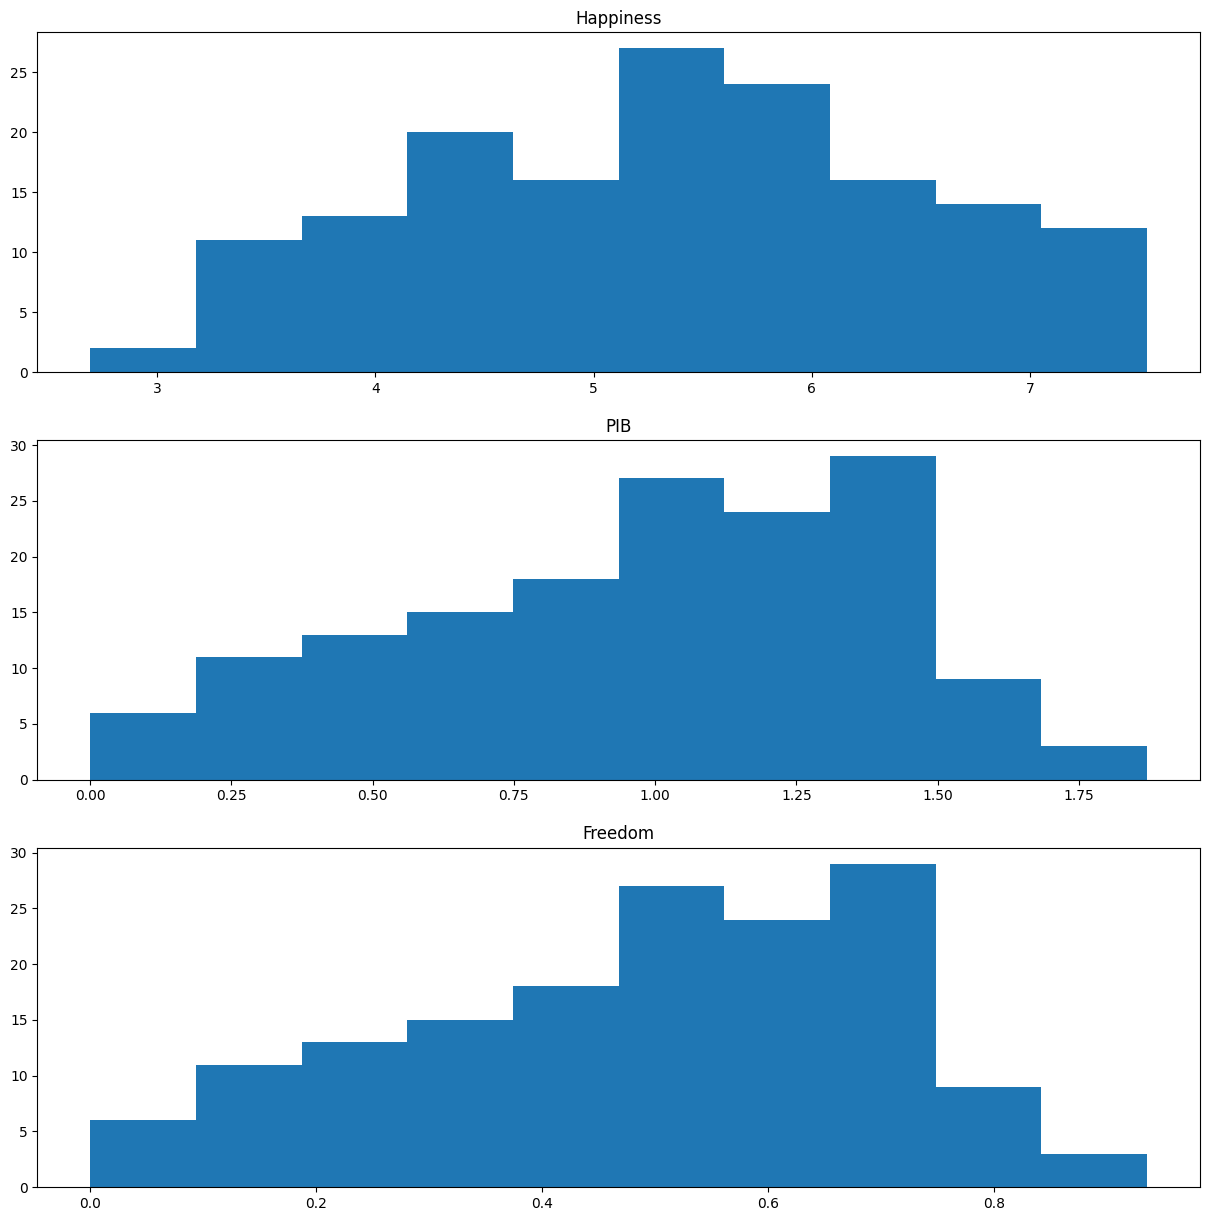

In [41]:
plotDataDistribution(world_happiness)

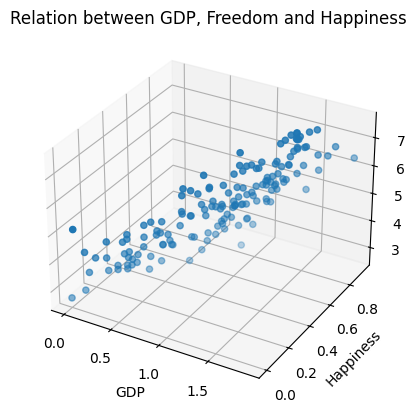

In [42]:
plotData(world_happiness)

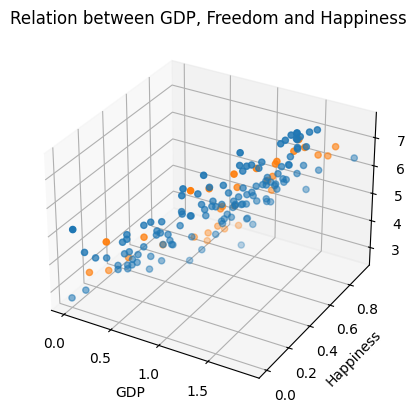

In [43]:
plotTrainingAndValidationDatas(world_happiness)

In [44]:
regresor = getRegressor(world_happiness)
w0, w1, w2 = regresor.intercept_, regresor.coef_[0], regresor.coef_[1]

print("f(x) = {} + {}*x1 + {}*x2".format(w0,w1,w2))

f(x) = 3.221996531501084 + -29380344.091793876*x1 + 58760692.542813785*x2


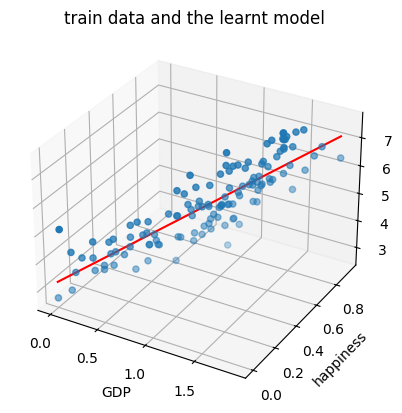

In [56]:
plotRegressor(world_happiness)

In [46]:
mErr, cErr = getErrors(world_happiness)

print("Manual error: {}\nComputed error: {}".format(mErr,cErr))

Manual error: 0.346335124670568
Computed error: 0.34633512467056804


## Problema 3

In [47]:
world_happiness = readDatas("datas/v2_world-happiness-report-2017.csv")
world_happiness = world_happiness.dropna()

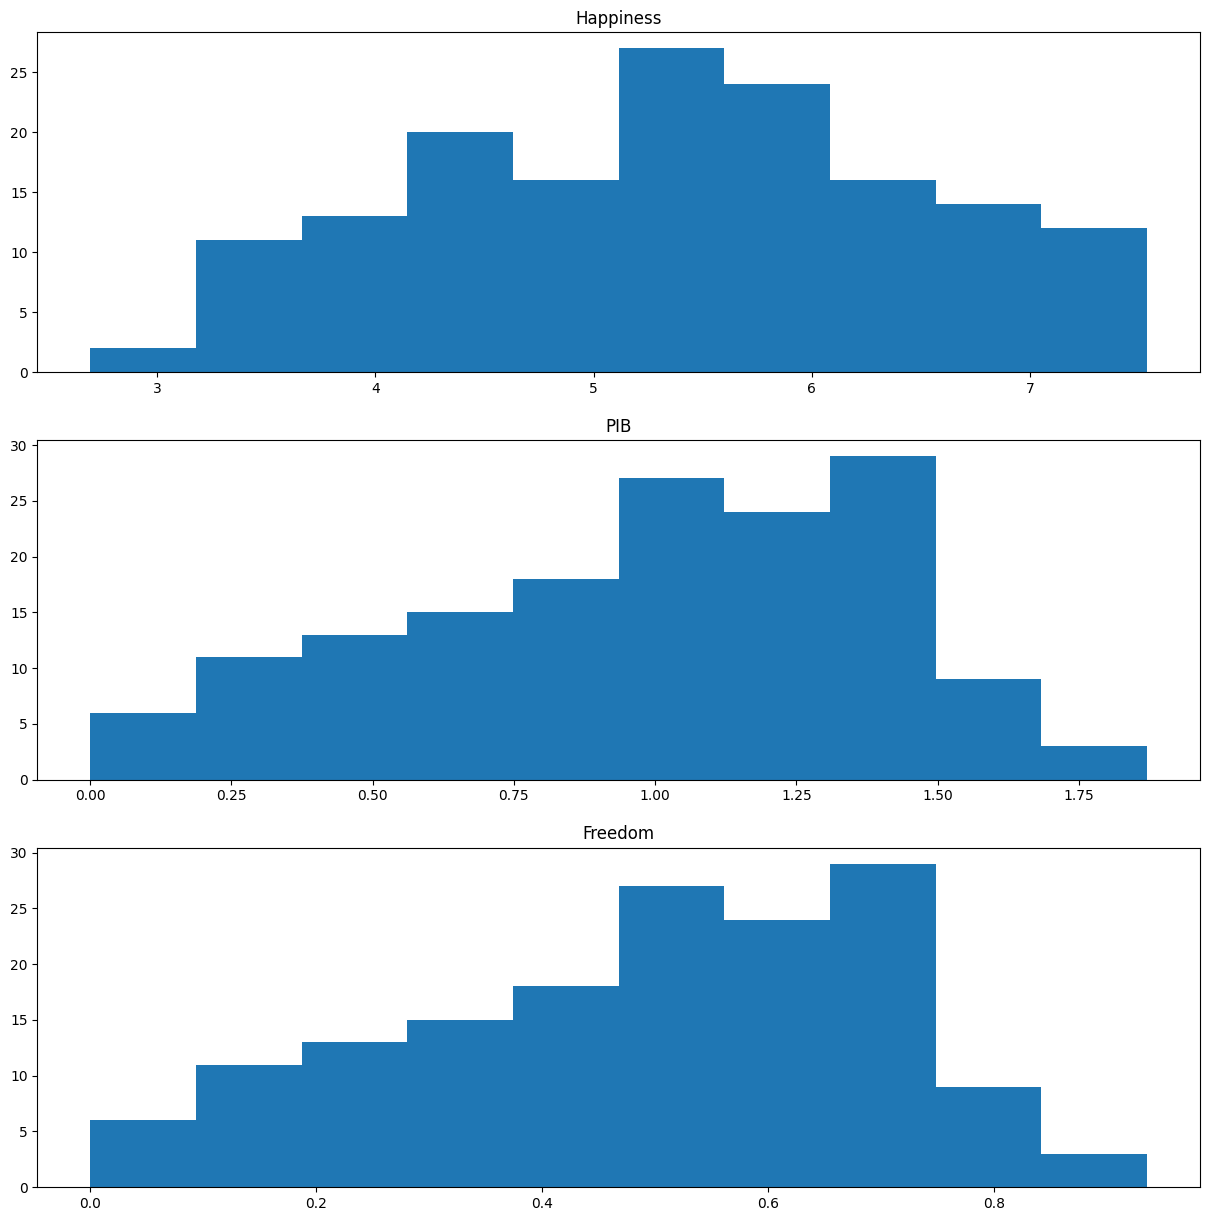

In [48]:
plotDataDistribution(world_happiness)

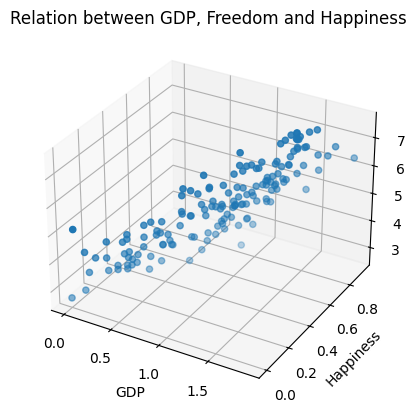

In [49]:
plotData(world_happiness)

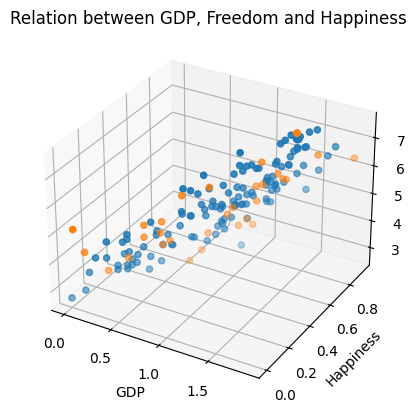

In [50]:
plotTrainingAndValidationDatas(world_happiness)

In [51]:
regresor = getRegressor(world_happiness)
w0, w1, w2 = regresor.intercept_, regresor.coef_[0], regresor.coef_[1]

print("f(x) = {} + {}*x1 + {}*x2".format(w0,w1,w2))

f(x) = 3.253424765857856 + -55402404.58140281*x1 + 110804813.4345515*x2


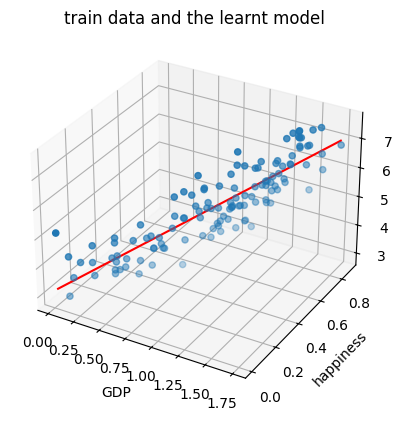

In [57]:
plotRegressor(world_happiness)

In [53]:
mErr, cErr = getErrors(world_happiness)

print("Manual error: {}\nComputed error: {}".format(mErr,cErr))

Manual error: 0.49053930374398286
Computed error: 0.49053930374398286
